Importing Dependencies

In [19]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn

import cv2
import matplotlib.pyplot as plt
import numpy as np

Defining transformer to convert our data to pytorch format and normalizing our data

In [20]:
#Transforms data and normalizes values between -1 and 1.
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5),(0.5))])

Fetching data

In [21]:
#Downloading training data
trainset = torchvision.datasets.MNIST('mnist',
                                      train = True,
                                      download = True,
                                      transform = transform)

#Downloading testing data
testset = torchvision.datasets.MNIST('mnist',
                                    train = False,
                                    download = True,
                                    transform = transform)

In [30]:
#Function for plotting data
def imgshow(image = None, size = 5):
  w, h = image.shape[0], image.shape[1]
  aspect_ratio = w/h
  plt.figure(figsize = (size*aspect_ratio, size))
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis(False)
  plt.show()

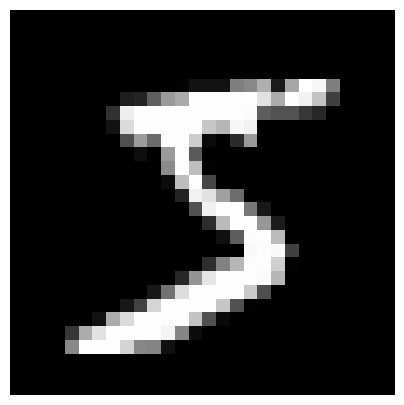

In [31]:
image = trainset.data[0].numpy()
imgshow(image)

In [34]:
trainset.data.shape

torch.Size([60000, 28, 28])

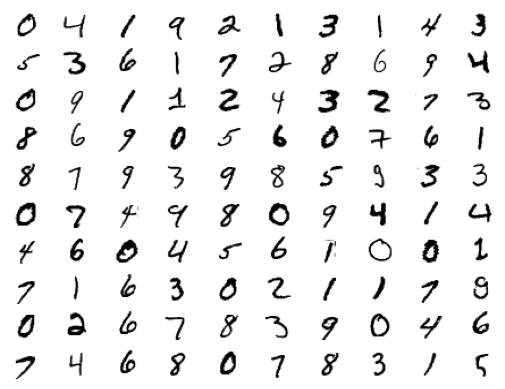

In [36]:
#Plotting starting 100 images
number_of_images = 100
plt.figure()

for index in range(1, number_of_images + 1):
  plt.subplot(10, 10, index)
  plt.axis(False)
  plt.imshow(trainset.data[index], cmap = 'gray_r')

Creating Data Loader

In [37]:
trainloader = torch.utils.data.DataLoader(trainset,
                                          batch_size = 128,
                                          shuffle = True,
                                          num_workers = 0)

testloader = torch.utils.data.DataLoader(testset,
                                         batch_size = 128,
                                         shuffle = False,
                                         num_workers = 0)

In [40]:
#Iterator for dataloader
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape)
print(labels.shape)

torch.Size([128, 1, 28, 28])
torch.Size([128])


IndexError: ignored

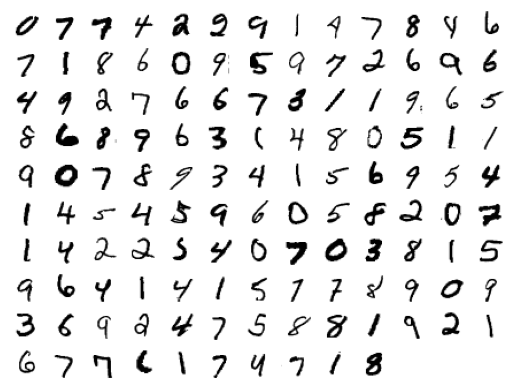

In [50]:
number_of_images = 128
plt.figure()

for index in range(1, number_of_images + 1):
  plt.subplot(10, 13, index)
  plt.axis(False)
  plt.imshow(images[index][0].numpy(), cmap = 'gray_r')